# Gradient Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis=1)

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [8]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5]
}

In [9]:
gb_model = GradientBoostingClassifier()

In [10]:
grid = GridSearchCV(gb_model, param_grid)

In [11]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [12]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [13]:
predictions = grid.predict(X_test)

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [15]:
feature_importance = grid.best_estimator_.feature_importances_

In [16]:
importance_features = pd.DataFrame(index=X.columns,
                                   data=feature_importance,
                                   columns=['Importance'])

In [17]:
importance_features = importance_features[importance_features['Importance']>0.0005]
importance_features = importance_features.sort_values('Importance')

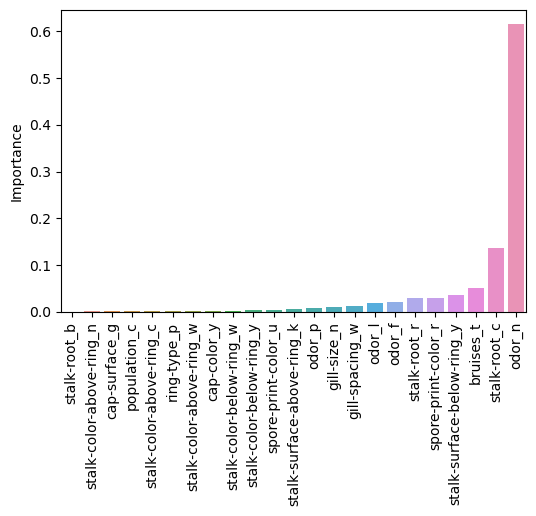

In [18]:
plt.figure(dpi=100)
sns.barplot(data = importance_features,
            x = importance_features.index,
            y = 'Importance')
plt.xticks(rotation=90);